# Single Qubit Operations
The development of our quantum computational toolkit begins with operations on the simplest quanutm system - a single qubit. The goal of this notebook is to introduce you to the frequently used single qubit gates. 

In [1]:
# First we are going to import the libraries needed 
from qiskit import *
from numpy import *
from qiskit.visualization import plot_bloch_multivector, plot_histogram
sim = Aer.get_backend('aer_simulator')


### X Gate
This is also calle the NOT gate. It takes the state $\alpha|0\rangle + \beta|1\rangle $ to the state $\alpha|1\rangle + \beta|0\rangle $ where we can see that the role of $|0\rangle$ and $|1\rangle$ have been simply swapped. The NOT gate can also be defined using the following matrix, $$X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$$

More compactly, we can represent the above operation using matrix multiplication. IF we write the state $\alpha|0\rangle + \beta|1\rangle $ as a vector $$\begin{bmatrix} \alpha\\ \beta \end{bmatrix}$$
Then the output after applying the NOT gate will be
$$X\begin{bmatrix} \alpha\\ \beta \end{bmatrix} = \begin{bmatrix} \beta\\ \alpha \end{bmatrix}$$

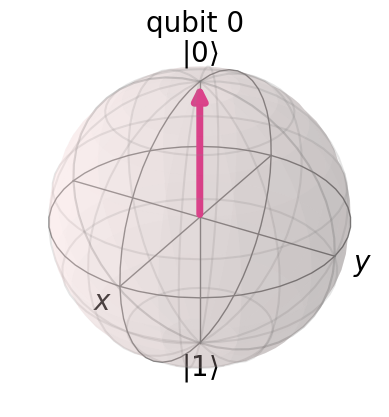

In [2]:
# Let's first see a circuit without any gates
circuit0 = QuantumCircuit(1,1)
circuit0.save_statevector()
qobj0 = assemble(circuit0)
state0 = sim.run(qobj0).result().get_statevector()
plot_bloch_multivector(state0)

The Bloch sphere above represents the $|0\rangle$ state. In vector form, it is $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$.

Now we define a new circuit with a single X gate

In [3]:
circuit1 = QuantumCircuit(1,1)
circuit1.x(0)
# Verify the circuit by drawing it
circuit1.draw()

┌───┐
  q: ┤ X ├
     └───┘
c: 1/═════

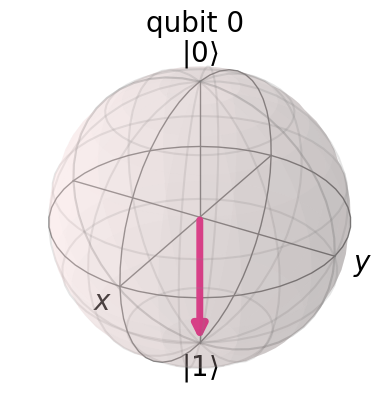

In [4]:
# Drawing the Bloch sphere
# The segment of code is usually what you would use to draw a Bloch sphere
circuit1.save_statevector()
qobj1 = assemble(circuit1)
state1 = sim.run(qobj1).result().get_statevector()
plot_bloch_multivector(state1)

Using the Bloch sphere, we can also understand this operation as rotating the vector by $\pi$ around the x-axis. 

Conceptual check: So if we are starting at the $|0\rangle $ state, what do we have after applying the X gate? 

### Y Gates
Along with the X Gate, the Y and Z gates all together are called the Pauli Gates. The matrix form of the Y gate can be defined as following: 
$$Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}$$
And let's see this gate in action. 

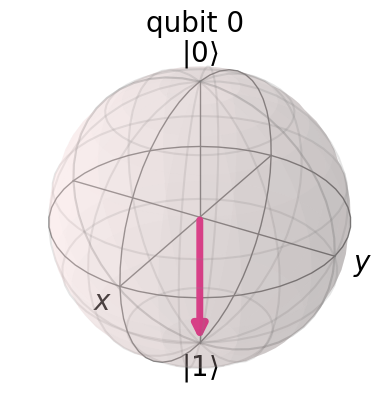

In [5]:
circuit3 = QuantumCircuit(1,1)
circuit3.y(0)
circuit3.save_statevector()
qobj3 = assemble(circuit3)
state3 = sim.run(qobj3).result().get_statevector()
plot_bloch_multivector(state3)

This might look the same as the result of X gate, but this time we are actually rotating the vector by $\pi$ around the y-axis. 

### Z Gates
To round up the Pauli Gates, we have the last Z gate. The matrix form of the Z gate can be defined as following: 
$$Y = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}$$
If we are starting with the state $\alpha|0\rangle + \beta |1\rangle $ the Z gate will leave $|0\rangle$ unchanged, and flips the sign of $|1\rangle$ to result $|-1\rangle$. This gives the state $\alpha|0\rangle - \beta |1\rangle $. 


Now let's see this gate in action. 

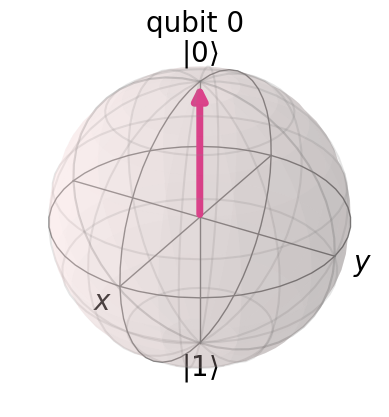

In [6]:
circuit4 = QuantumCircuit(1,1)
circuit4.z(0)
circuit4.save_statevector()
qobj4 = assemble(circuit4)
state4 = sim.run(qobj4).result().get_statevector()
plot_bloch_multivector(state4)

Using the Bloch sphere, we might say that the Z gate has no effect on the qubit. This is because a Z gate performs rotations by $\pi$ around the z-axis. 

### Hadamard Gate
This is one of the most important quantum gates. Previously, all the pauli gates have been performing rotations by a full $\pi$ around a certain axis. But what if we want to move away from the two poles? The H gate rotates the vector about the y-axis by $90\degree$ and then about the x-axis by $180\degree$. What this does is that it creates a superposition of $|0\rangle$ and $|1\rangle$. For example, if we start with the state $\alpha|0\rangle + \beta|1\rangle $, H gate takes the state to $\alpha\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)+\beta\frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$. 

More formally, the matrix definition of the H gate is as follows: 
$$H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$$

And let's now see this in action. 

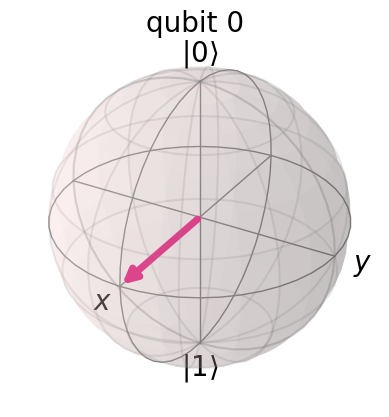

In [7]:
circuit5 = QuantumCircuit(1,1)
circuit5.h(0)
circuit5.save_statevector()
qobj5 = assemble(circuit5)
state5 = sim.run(qobj5).result().get_statevector()
plot_bloch_multivector(state5)

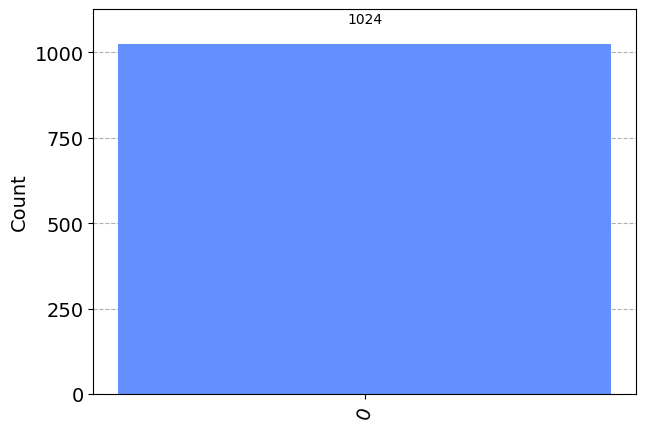

In [13]:
counts5 = sim.run(qobj5).result().get_counts()
plot_histogram(counts5)

Now that the qubit is in superposition, it has 50/50 chance of being measured 0 or 1. 

Some interesting identities you can have using the Pauli matrices and H gate: 
$$HXH = Z;\;HYH = -Y\;HZH = X$$

# P Gate + S and T Gates
When we want to perform a rotation of certain angle, we can use the Phase Gate. The P Gate takes an additional parameter $\phi$ to rotate $\phi$ around the z-axis. The matrix definition of this gate is as follows,
$$P(\phi) = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\phi} \end{bmatrix}$$

The S and T gates are special cases of the P gate where: for S gate, $\phi = \pi/2$, and for T gate, $\phi = \pi/4$. 

Visually the Bloach sphere would look identical after applying to a P gate. To test your understanding, first run the first cell below and try to visualize the following circuit before running the second cell below to check. 

In [8]:
circuit6 = QuantumCircuit(1,1)
circuit6.h(0)
circuit6.t(0)
circuit6.draw()

┌───┐┌───┐
  q: ┤ H ├┤ T ├
     └───┘└───┘
c: 1/══════════

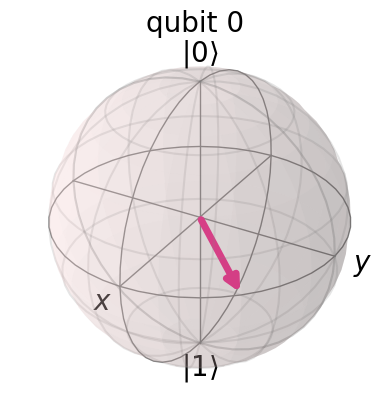

In [9]:
circuit6.save_statevector()
qobj6 = assemble(circuit6)
state6 = sim.run(qobj6).result().get_statevector()
plot_bloch_multivector(state6)